1. Descriptive Statistics
Calculate summary statistics for numerical features such as price,
minimum_nights, maximum_nights, number_of_reviews, and
review_scores_rating. Understand the central tendency, dispersion, and
distribution of these variables.

In [1]:
import pandas as pd

# Load the CSV file
file_path = './data/listings.csv'   # boston
data = pd.read_csv(file_path)

# Extracting the relevant columns for descriptive statistics
columns_of_interest = ['price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating']

# Convert 'price' to numerical by removing any non-numeric characters like '$' and ',' and then converting to float
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculating descriptive statistics for the selected columns
summary_statistics = data[columns_of_interest].describe()

# Display the summary statistics
print(summary_statistics)

             price  minimum_nights  maximum_nights  number_of_reviews  \
count  3543.000000     4325.000000     4325.000000        4325.000000   
mean    239.949478       27.796763      597.905896          45.946127   
std     230.966923       36.266386      431.509974          91.367216   
min      25.000000        1.000000        3.000000           0.000000   
25%     112.000000        1.000000      365.000000           1.000000   
50%     190.000000       29.000000      365.000000           9.000000   
75%     285.000000       32.000000     1125.000000          46.000000   
max    4786.000000      600.000000     1125.000000         994.000000   

       review_scores_rating  
count           3326.000000  
mean               4.713536  
std                0.442439  
min                1.000000  
25%                4.650000  
50%                4.830000  
75%                4.980000  
max                5.000000  


2. Distribution Analysis
Plot histograms or density plots for key numerical features like price,
minimum_nights, and review_scores_rating. Analyze the distribution of
these features to identify any skewness or outliers.

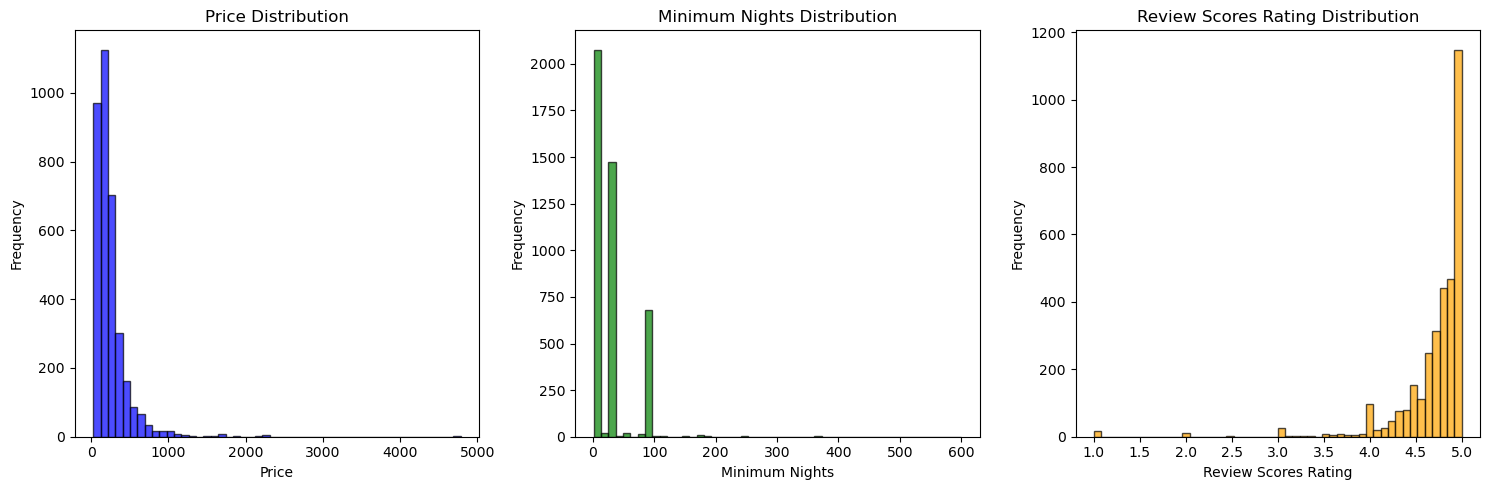

In [2]:
import matplotlib.pyplot as plt

# Plot histograms for key numerical features
plt.figure(figsize=(15, 5))

# Price histogram
plt.subplot(1, 3, 1)
plt.hist(data['price'], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Minimum nights histogram
plt.subplot(1, 3, 2)
plt.hist(data['minimum_nights'], bins=50, color='green', edgecolor='black', alpha=0.7)
plt.title('Minimum Nights Distribution')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')

# Review scores rating histogram
plt.subplot(1, 3, 3)
plt.hist(data['review_scores_rating'].dropna(), bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title('Review Scores Rating Distribution')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


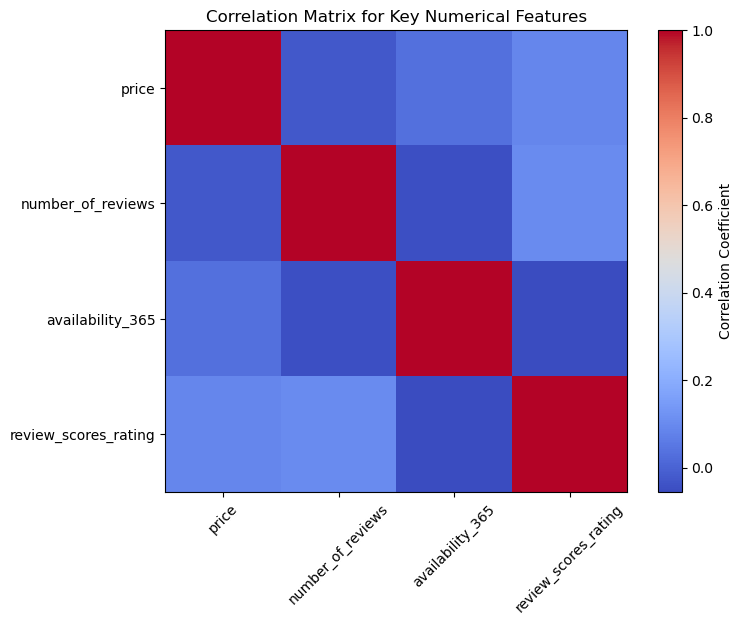

,price,number_of_reviews,availability_365,review_scores_rating
price,1.000000,-0.027068,0.033836,0.088569
number_of_reviews,-0.027068,1.000000,-0.045956,0.100892
availability_365,0.033836,-0.045956,1.000000,-0.056409
review_scores_rating,0.088569,0.100892,-0.056409,1.000000


In [3]:

# Convert 'price' to numerical by removing any non-numeric characters like '$' and ',' and then converting to float
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Selecting the relevant columns for correlation analysis
correlation_columns = ['price', 'number_of_reviews', 'availability_365', 'review_scores_rating']

# Creating the correlation matrix
correlation_matrix = data[correlation_columns].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_columns)), correlation_columns, rotation=45)
plt.yticks(range(len(correlation_columns)), correlation_columns)
plt.title('Correlation Matrix for Key Numerical Features')
plt.show()

# Displaying the correlation matrix
correlation_matrix

4. Price Analysis
Analyze the distribution of prices across different neighborhoods
(`host_neighbourhood`) or room types (if available). Understand which
neighborhoods have higher or lower average prices and whether certain
neighborhoods are more popular for shortterm or longterm stays.

In [4]:

# Convert 'price' to numerical by removing any non-numeric characters like '$' and ',' and then converting to float
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Checking for the 'minimum_nights' column to analyze short-term vs. long-term stays
if 'host_neighbourhood' in data.columns and 'minimum_nights' in data.columns:
    # Defining short-term as stays of 30 nights or less, and long-term as more than 30 nights
    data['stay_type'] = data['minimum_nights'].apply(lambda x: 'Short-term' if x <= 30 else 'Long-term')
    
    # Grouping by neighborhood and stay type to get the average price
    neighborhood_stay_price = data.groupby(['host_neighbourhood', 'stay_type'])['price'].mean().unstack()

    # Sorting by the difference in average prices between short-term and long-term stays
    neighborhood_stay_price['price_diff'] = neighborhood_stay_price['Short-term'] - neighborhood_stay_price['Long-term']
    neighborhood_stay_price = neighborhood_stay_price.sort_values(by='price_diff', ascending=False)

    # Display the results
    print("Average Price by Neighborhood for Short-term and Long-term Stays:")
    print(neighborhood_stay_price)
else:
    print("The dataset does not contain 'host_neighbourhood' or 'minimum_nights' columns.")


Average Price by Neighborhood for Short-term and Long-term Stays:
stay_type               Long-term  Short-term  price_diff
host_neighbourhood                                       
City Point             116.333333  529.833333  413.500000
Chinatown              213.000000  504.117647  291.117647
Leather District       168.000000  454.545455  286.545455
Fort Point             118.000000  373.000000  255.000000
Fenway–Kenmore         190.600000  399.245283  208.645283
...                           ...         ...         ...
Wellington-Harrington         NaN   70.571429         NaN
West Fens                     NaN  320.800000         NaN
West Yarmouth                 NaN         NaN         NaN
White Rock East               NaN         NaN         NaN
Williamsburg                  NaN         NaN         NaN

[123 rows x 3 columns]


5. Neighborhood Comparison
Compare the average review_scores_rating across different
neighborhoods. Determine if certain neighborhoods have consistently higher
ratings, which could indicate better or worse guest experiences.

In [5]:

# Checking if 'host_neighbourhood' and 'review_scores_rating' columns are present in the dataset
if 'host_neighbourhood' in data.columns and 'review_scores_rating' in data.columns:
    # Grouping by neighborhood to get the average review scores rating
    neighborhood_rating = data.groupby('host_neighbourhood')['review_scores_rating'].mean().sort_values(ascending=False)
    
    # Display the results
    print("Average Review Scores Rating by Neighborhood:")
    print(neighborhood_rating)
else:
    print("The dataset does not contain 'host_neighbourhood' or 'review_scores_rating' columns.")


Average Review Scores Rating by Neighborhood:
host_neighbourhood
Hawthorne                  5.0
Brook Farm                 5.0
Paradise Valley Village    5.0
Fairmount Hill             5.0
Neighborhood Nine          5.0
                          ... 
Tribeca                    NaN
Wanskuck                   NaN
Ward Two                   NaN
Watertown                  NaN
White Rock East            NaN
Name: review_scores_rating, Length: 123, dtype: float64


6. Outlier Detection
Identify outliers in the dataset, particularly in price, minimum_nights, and
review_scores_rating.

In [7]:
# Define a function to detect outliers using the IQR (Interquartile Range) method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identifying outliers for 'price', 'minimum_nights', and 'review_scores_rating'
outliers_price = detect_outliers(data, 'price')
outliers_minimum_nights = detect_outliers(data, 'minimum_nights')
outliers_review_scores_rating = detect_outliers(data, 'review_scores_rating')

# Displaying the number of outliers
outlier_summary = {
    'Price Outliers': len(outliers_price),
    'Minimum Nights Outliers': len(outliers_minimum_nights),
    'Review Scores Rating Outliers': len(outliers_review_scores_rating)
}

# Showing a sample of the outliers
outliers_sample = pd.concat([outliers_price.head(), outliers_minimum_nights.head(), outliers_review_scores_rating.head()], axis=0)

# Print summary and sample of outliers
print(pd.DataFrame(outlier_summary.items(), columns=["Feature", "Number of Outliers"]))
print(outliers_sample)

                         Feature  Number of Outliers
0                 Price Outliers                 241
1        Minimum Nights Outliers                 716
2  Review Scores Rating Outliers                 225
          id                           listing_url       scrape_id  \
61   1130279  https://www.airbnb.com/rooms/1130279  20240622024514   
86   1810397  https://www.airbnb.com/rooms/1810397  20240622024514   
100  2277821  https://www.airbnb.com/rooms/2277821  20240622024514   
112  2864688  https://www.airbnb.com/rooms/2864688  20240622024514   
187  5088560  https://www.airbnb.com/rooms/5088560  20240622024514   
3       8789     https://www.airbnb.com/rooms/8789  20240622024514   
4      10811    https://www.airbnb.com/rooms/10811  20240622024514   
14     67774    https://www.airbnb.com/rooms/67774  20240622024514   
21    184893   https://www.airbnb.com/rooms/184893  20240622024514   
32    496022   https://www.airbnb.com/rooms/496022  20240622024514   
6      10986    ht

In [6]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


7. Text Length: Create a new feature that measures the length of each
review (number of words or characters). Determine if the length of a review
correlates with its sentiment or the review scores.

In [8]:
import pandas as pd
from textblob import TextBlob

# Load the CSV file with reviews
file_path = './data/reviews.csv'
data = pd.read_csv(file_path)

# Create a new feature for the length of each review in terms of word count and character count
data['review_word_count'] = data['comments'].astype(str).apply(lambda x: len(x.split()))
data['review_char_count'] = data['comments'].astype(str).apply(len)

# Performing sentiment analysis on the 'comments' column
# Adding a new column for sentiment polarity (-1 = negative, 1 = positive)
data['sentiment_polarity'] = data['comments'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculating the correlation between review length (word count) and sentiment polarity
correlation_word_sentiment = data[['review_word_count', 'sentiment_polarity']].corr()
correlation_char_sentiment = data[['review_char_count', 'sentiment_polarity']].corr()

# Display the correlation results
print("Correlation between Review Word Count and Sentiment Polarity:")
print(correlation_word_sentiment)

print("\nCorrelation between Review Character Count and Sentiment Polarity:")
print(correlation_char_sentiment)


KeyboardInterrupt: 